## 학생 성적 예측하기
이번에는 학생 성적 예측 문제를 선형 회귀와 랜덤포레스트 두 가지 모델로 해보겠다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.000000      15.000000
25%      58.000000      

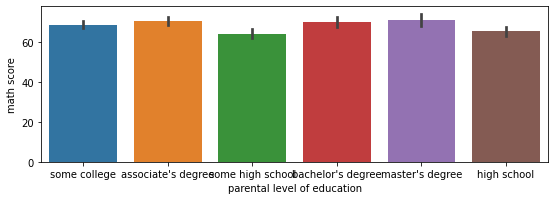

In [16]:
df1 = df.groupby("race/ethnicity")[['math score', 'reading score', 'writing score']].mean()
df2 = df.groupby("parental level of education")[['math score', 'reading score', 'writing score']].mean()
df3 = df.groupby("gender")[['math score', 'reading score', 'writing score']].mean()
df4 = df.groupby("lunch")[['math score', 'reading score', 'writing score']].mean()
df5= df.groupby("test preparation course")[['math score', 'reading score', 'writing score']].mean()

In [17]:
df1, df2, df3, df4, df5

(                math score  reading score  writing score
 race/ethnicity                                          
 group A          65.696203      69.202532      67.848101
 group B          64.070707      68.530303      66.717172
 group C          65.510836      68.609907      66.804954
 group D          68.879377      70.929961      71.058366
 group E          77.426573      76.615385      75.034965,
                              math score  reading score  writing score
 parental level of education                                          
 associate's degree            70.348039      72.647059      72.039216
 bachelor's degree             69.866667      71.819048      72.266667
 high school                   65.381395      69.223256      66.772093
 master's degree               71.026667      71.973333      71.746667
 some college                  68.642857      70.941964      69.473214
 some high school              64.197740      66.943503      65.293785,
         math score  rea

In [20]:
df['test preparation course'] = df['test preparation course'].map({'completed':1, 'none':0})
df['gender'] = df['gender'].map({'male':0, 'female':1})
df['lunch'] = df['lunch'].map({'free/reduced':0, 'standard':1})
df['parental level of education'] = df['parental level of education'].map({"associate's degree":3, "bachelor's degree":4, "master's degree":5, 'some college':2, 'high school':1, 'some high school':1})
df['race/ethnicity'] = df['race/ethnicity'].map({'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E': 5})

In [21]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,4,2,1,1,59,70,78
1,0,4,3,1,0,96,93,87
2,1,4,2,0,0,57,76,77
3,0,2,2,0,0,70,70,63
4,1,4,3,1,0,83,85,86
...,...,...,...,...,...,...,...,...
995,0,3,2,1,0,77,77,71
996,0,3,2,1,0,80,66,66
997,1,1,1,1,1,67,86,86
998,0,5,1,1,0,80,72,62


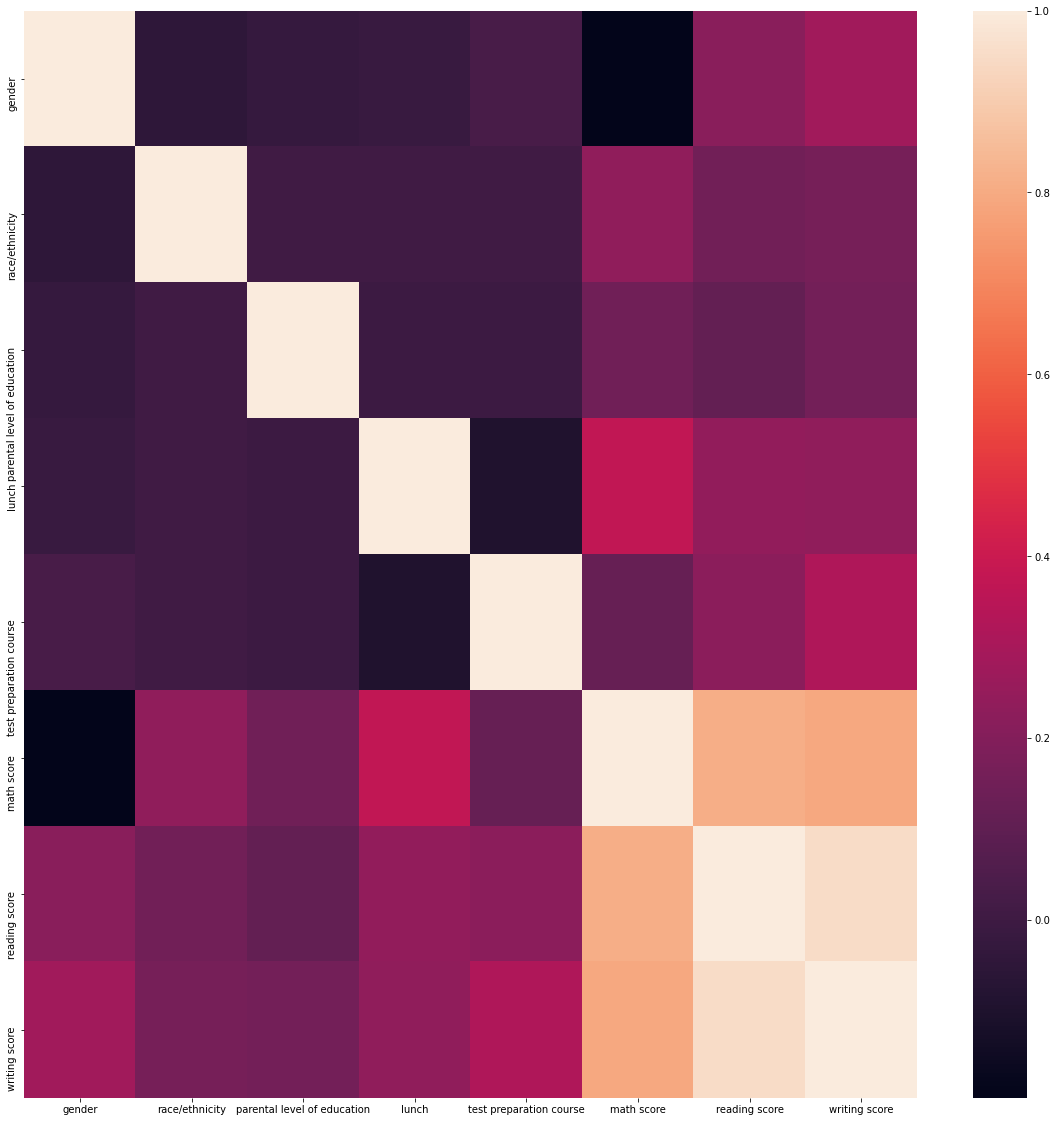

In [25]:
# 시각화 및 전처리
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr())

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

train_df, test_df = train_test_split(df, train_size = 0.8)
features = ['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'writing score']
target = 'reading score'
train_x = train_df[features]
train_y = train_df[target]
test_x = test_df[features]
test_y = test_df[target]

lrmodel = LinearRegression()
lrmodel.fit(train_x, train_y)
print('lrmodel train accuracy: ', lrmodel.score(train_x, train_y))
print('lrmodel test accuaracy: ', lrmodel.score(test_x, test_y))

rfmodel = RandomForestRegressor(n_estimators=70, max_depth=6)
rfmodel.fit(train_x, train_y)
print('rfmodel train accuracy: ', rfmodel.score(train_x, train_y))
print('rfmodel test accuaracy: ', rfmodel.score(test_x, test_y))

lrmodel train accuracy:  0.9194931450127206
lrmodel test accuaracy:  0.886613443295562
rfmodel train accuracy:  0.9397278471702896
rfmodel test accuaracy:  0.8684322891101378


<AxesSubplot:>

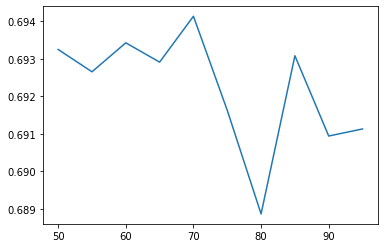

In [33]:
scores = []
for i in range(50, 100, 5):
    rfmodel = RandomForestRegressor(n_estimators=i, max_depth=6)
    rfmodel.fit(train_x, train_y)
    scores.append(rfmodel.score(test_x, test_y))
    
sns.lineplot(x=range(50, 100, 5), y=scores)

In [36]:
df.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']